# plotnine

[plotnine](http://plotnine.readthedocs.io/en/stable/) is an extension of [ggplot](http://ggplot.yhathq.com/). The language makes it to compose the data with the layout. I replicate the example from the gallery [Two Variable Bar Plot](http://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_col.html#two-variable-bar-plot).

In [1]:
%matplotlib inline

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## example

In [3]:
import pandas as pd

df = pd.DataFrame({
    'variable': ['gender', 'gender', 'age', 'age', 'age', 'income', 'income', 'income', 'income'],
    'category': ['Female', 'Male', '1-24', '25-54', '55+', 'Lo', 'Lo-Med', 'Med', 'High'],
    'value': [60, 40, 50, 30, 20, 10, 25, 25, 40],
})
df['variable'] = pd.Categorical(df['variable'], categories=['gender', 'age', 'income'])

df

,category,value,variable
0,Female,60,gender
1,Male,40,gender
2,1-24,50,age
3,25-54,30,age
4,55+,20,age
5,Lo,10,income
6,Lo-Med,25,income
7,Med,25,income
8,High,40,income


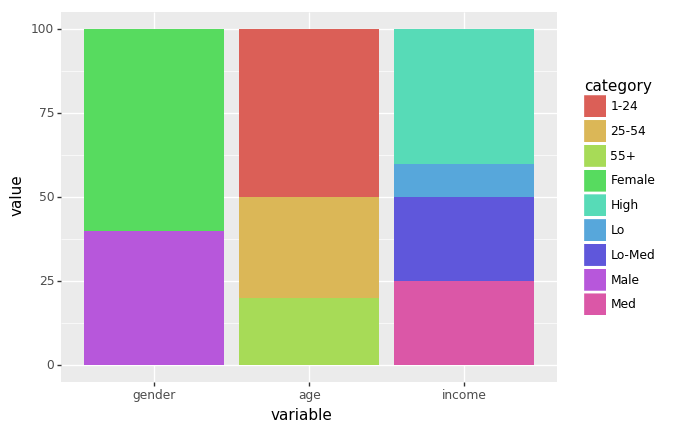

<ggplot: (-9223371856205249497)>

In [4]:
from plotnine import ggplot, aes, geom_col

(ggplot(df, aes(x='variable', y='value', fill='category')) + geom_col())

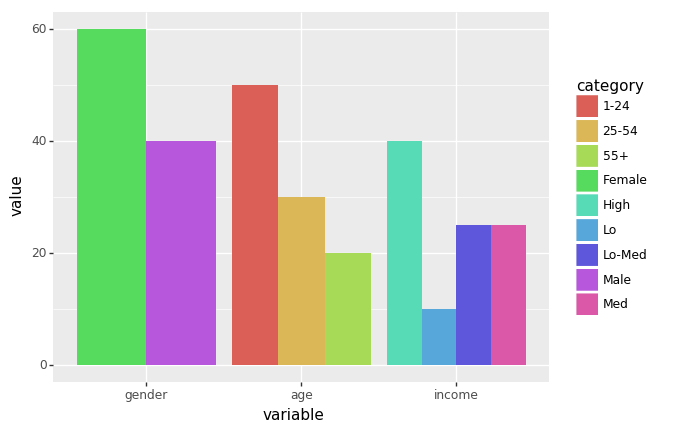

<ggplot: (180649573110)>

In [5]:
from plotnine import geom_bar

(ggplot(df, aes(x='variable', y='value', fill='category'))
 + geom_bar(stat='identity', position='dodge'))  

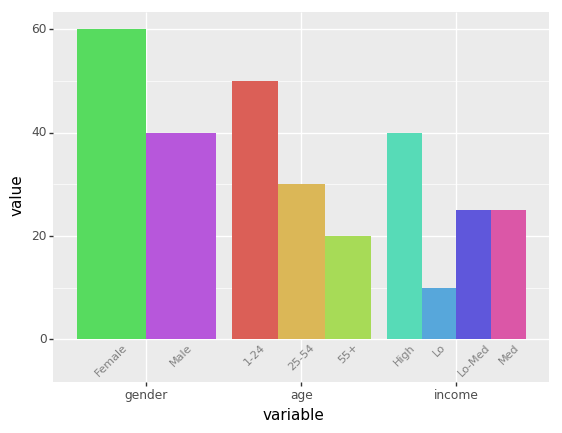

<ggplot: (-9223371856205015429)>

In [6]:
from plotnine import position_dodge, geom_text, lims

dodge_text = position_dodge(width=0.9)                              # new

(ggplot(df, aes(x='variable', y='value', fill='category'))
 + geom_bar(stat='identity', position='dodge', show_legend=False)   # modified
 + geom_text(aes(y=-.5, label='category'),                          # new
             position=dodge_text,
             color='gray', size=8, angle=45, va='top')
 + lims(y=(-5, 60))                                                 # new
)

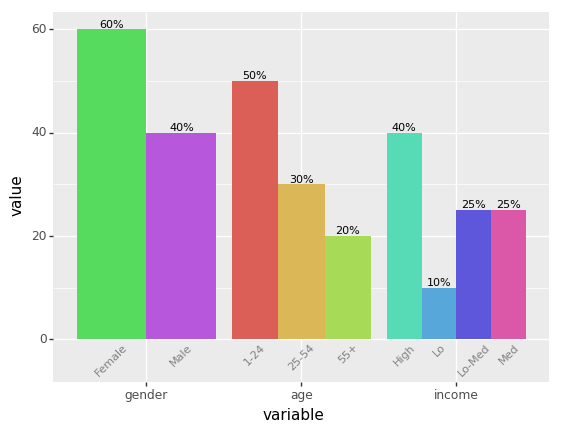

<ggplot: (-9223371856204966361)>

In [7]:

dodge_text = position_dodge(width=0.9)

(ggplot(df, aes(x='variable', y='value', fill='category'))
 + geom_bar(stat='identity', position='dodge', show_legend=False)
 + geom_text(aes(y=-.5, label='category'),
             position=dodge_text,
             color='gray', size=8, angle=45, va='top')
 + geom_text(aes(label='value'),                                    # new
             position=dodge_text,
             size=8, va='bottom', format_string='{}%')
 + lims(y=(-5, 60))
)

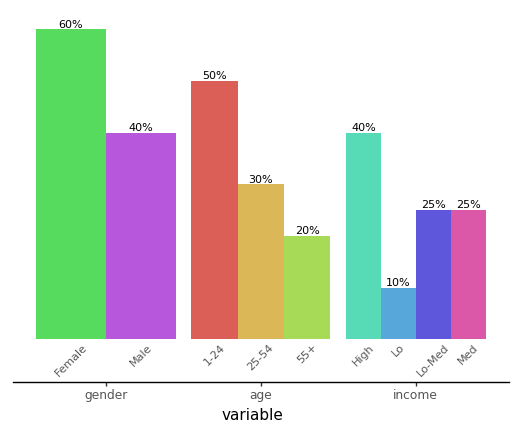

<ggplot: (180650051129)>

In [8]:
from plotnine import theme, element_rect, element_blank, element_line, element_text

dodge_text = position_dodge(width=0.9)
ccolor = '#555555'

(ggplot(df, aes(x='variable', y='value', fill='category'))
 + geom_bar(stat='identity', position='dodge', show_legend=False)
 + geom_text(aes(y=-.5, label='category'),
             position=dodge_text,
             color=ccolor, size=8, angle=45, va='top')              # modified
 + geom_text(aes(label='value'),
             position=dodge_text,
             size=8, va='bottom', format_string='{}%')
 + lims(y=(-5, 60))
 + theme(panel_background=element_rect(fill='white'),               # new
         axis_title_y=element_blank(),
         axis_line_x=element_line(color='black'),
         axis_line_y=element_blank(),
         axis_text_y=element_blank(),
         axis_text_x=element_text(color=ccolor),
         axis_ticks_major_y=element_blank(),
         panel_grid=element_blank(),
         panel_border=element_blank())
)